## Imports and Reading Data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [50]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

## Data Understanding

In [51]:
display(cab.shape)
display(cab.head(5))

(359392, 7)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [52]:
display(city.shape)
display(city.head(5))

(20, 3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [53]:
display(customer.shape)
display(customer.head(5))

(49171, 4)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [54]:
display(transaction.shape)
display(transaction.head(5))

(440098, 3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## Clean Data

In [55]:
# Convert "Date of Travel" from integer to date format
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'], origin='1899-12-30', unit='D')

In [56]:
# Remove any commas and convert the columns to numeric types
city['Population'] = city['Population'].str.replace(',', '').astype(int)
city['Users'] = city['Users'].str.replace(',', '').astype(int)

In [57]:
# Ensure there are no missing values
customer.isnull().sum()  # This should show 0 for all columns

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [58]:
# Ensure there are no missing values
transaction.isnull().sum()  # This should show 0 for all columns

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

## Merge Data

In [59]:
# Merge Cab_Data with Transaction_ID on "Transaction ID"
merged_data_1 = pd.merge(cab, transaction, on="Transaction ID")

In [60]:
# Merge the result with Customer_ID on "Customer ID"
merged_data_2 = pd.merge(merged_data_1, customer, on="Customer ID")

In [61]:
# Merge the result with City on "City"
final_merged_data = pd.merge(merged_data_2, city, on="City")

In [63]:
# Display the first few rows of the final merged data
print(final_merged_data.head())

   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350        29290         Card   Male   28   
1         598.70      317.4228        29290         Cash   Male   28   
2         792.05      597.4020        29290         Card   Male   28   
3         358.52      334.8540        27703         Card   Male   27   
4         721.10      467.1192        27703         Card   Male   27   

   Income (USD/Month)  Population  Users  
0               10813      814885  24701  
1               10813      814885  2

## Data Visualization

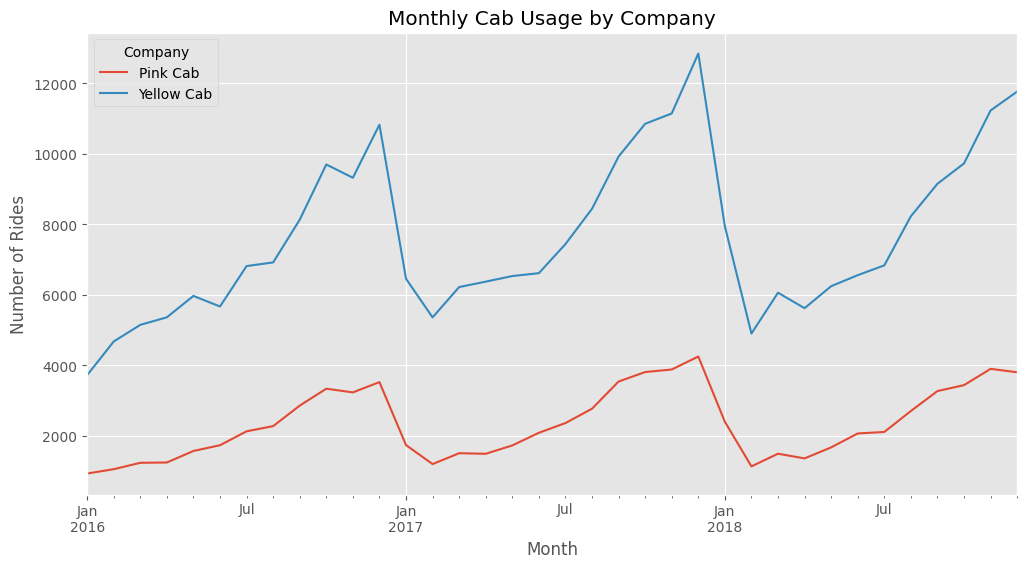

In [64]:
# Time series of cab usage
final_merged_data['YearMonth'] = final_merged_data['Date of Travel'].dt.to_period('M')
monthly_usage = final_merged_data.groupby(['YearMonth', 'Company']).size().unstack()

monthly_usage.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Cab Usage by Company')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

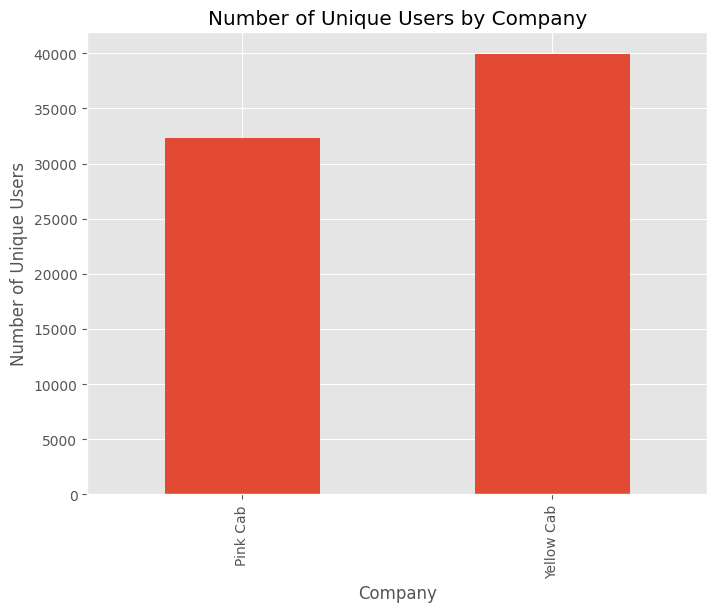

In [65]:
# Number of users by company
user_counts = final_merged_data.groupby('Company')['Customer ID'].nunique()

user_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Number of Unique Users by Company')
plt.xlabel('Company')
plt.ylabel('Number of Unique Users')
plt.show()